In [74]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns

In [2]:
segmentos = gpd.read_file('Segmentacion_General_San_Martin.geojson')

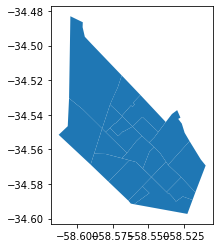

In [3]:
segmentos.plot()

In [4]:
segmentos

,Name,description,geometry
0,Lynch - Sur,Villa Lynch,"POLYGON ((-58.52269 -34.59732, -58.51908 -34.5..."
1,Villa Maipu,Villa Maipu,"POLYGON ((-58.51707 -34.58484, -58.50985 -34.5..."
2,San Martín,San Martin,"POLYGON ((-58.54787 -34.57598, -58.53731 -34.5..."
3,Villa Libertad,Villa Libertad,"POLYGON ((-58.54930 -34.58526, -58.55423 -34.5..."
4,Billinghurst - Norte,Billinghurst,"POLYGON ((-58.57804 -34.57871, -58.56345 -34.5..."
5,Loma Hermosa,Loma Hermosa,"POLYGON ((-58.59057 -34.56881, -58.58251 -34.5..."
6,San Andres - Norte,San Andres,"POLYGON ((-58.53783 -34.54422, -58.54578 -34.5..."
7,Ballester - Las Heras,Villa Ballester,"POLYGON ((-58.56509 -34.56212, -58.56874 -34.5..."
8,Ballester - Gral. Guido,Villa Ballester,"POLYGON ((-58.58009 -34.54998, -58.56509 -34.5..."
9,Ballester - VIlla De Sucre,Villa Ballester,"POLYGON ((-58.56118 -34.54686, -58.56831 -34.5..."


In [5]:
propiedades = pd.read_csv('features_propiedades_863.csv')
propiedades = gpd.GeoDataFrame(propiedades, geometry=gpd.points_from_xy(propiedades.logitud, propiedades.latitud))

In [6]:
segmentos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
propiedades = propiedades.set_crs('EPSG:4326')

In [8]:
propiedades.head()

,Unnamed: 0,categoria,localidad,superficie_cubierta_m2,dormitorios,antiguedad,banos,precio_USD,latitud,logitud,geometry
0,0,departamento,ballester,44.0,1.0,6.0,1.0,NaN,NaN,NaN,POINT EMPTY
1,1,departamento,ballester,53.0,1.0,4.0,2.0,122000.0,-34.545467,-58.552177,POINT (-58.55218 -34.54547)
2,2,departamento,ballester,55.0,1.0,0.0,1.0,93500.0,-34.549740,-58.550430,POINT (-58.55043 -34.54974)
3,3,departamento,ballester,42.0,1.0,1.0,1.0,69000.0,-34.543205,-58.552757,POINT (-58.55276 -34.54321)
4,4,departamento,ballester,85.0,2.0,0.0,2.0,150000.0,-34.548748,-58.556840,POINT (-58.55684 -34.54875)


In [9]:
join = propiedades.sjoin(segmentos, how='inner')

In [24]:
join.head()

,Unnamed: 0,categoria,localidad,superficie_cubierta_m2,dormitorios,antiguedad,banos,precio_USD,latitud,logitud,geometry,index_right,Name,description,precio/m2
1,1,departamento,ballester,53.0,1.0,4.0,2.0,122000.0,-34.545467,-58.552177,POINT (-58.55218 -34.54547),18,Ballester - Centro,Villa Ballester,2301.886792
2,2,departamento,ballester,55.0,1.0,0.0,1.0,93500.0,-34.549740,-58.550430,POINT (-58.55043 -34.54974),18,Ballester - Centro,Villa Ballester,1700.000000
3,3,departamento,ballester,42.0,1.0,1.0,1.0,69000.0,-34.543205,-58.552757,POINT (-58.55276 -34.54321),18,Ballester - Centro,Villa Ballester,1642.857143
4,4,departamento,ballester,85.0,2.0,0.0,2.0,150000.0,-34.548748,-58.556840,POINT (-58.55684 -34.54875),18,Ballester - Centro,Villa Ballester,1764.705882
5,5,departamento,ballester,52.0,1.0,0.0,2.0,130000.0,-34.549328,-58.551052,POINT (-58.55105 -34.54933),18,Ballester - Centro,Villa Ballester,2500.000000


In [21]:
join['precio/m2'] =  join.precio_USD / join.superficie_cubierta_m2

In [70]:
promedios_localidades = join.groupby('Name').mean()[['superficie_cubierta_m2', 'antiguedad', 'precio_USD', 'precio/m2']]

In [71]:
promedios_localidades

,superficie_cubierta_m2,antiguedad,precio_USD,precio/m2
Name,,,,
Ballester - Centro,89.892562,11.899160,154072.977099,1968.514389
Ballester - Gral. Guido,93.957895,18.925926,128250.000000,1487.804660
Ballester - Las Heras,191.575000,31.419355,237071.428571,1303.766394
Ballester - Norte,104.694737,19.912088,141698.019802,1456.422599
Ballester - VIlla De Sucre,119.695652,26.681818,123040.000000,1181.540400
Ballester - Zapiola,108.571429,21.000000,117571.428571,1124.512717
Billinghurst - Norte,70.500000,10.500000,92250.000000,1479.044193
Billinghurst - Sur,74.111111,31.700000,95153.846154,1077.353719
Loma Hermosa,115.500000,11.250000,114250.000000,957.364341


In [85]:
features = join[['superficie_cubierta_m2', 'antiguedad', 'precio_USD', 'precio/m2','banos','dormitorios','description']]

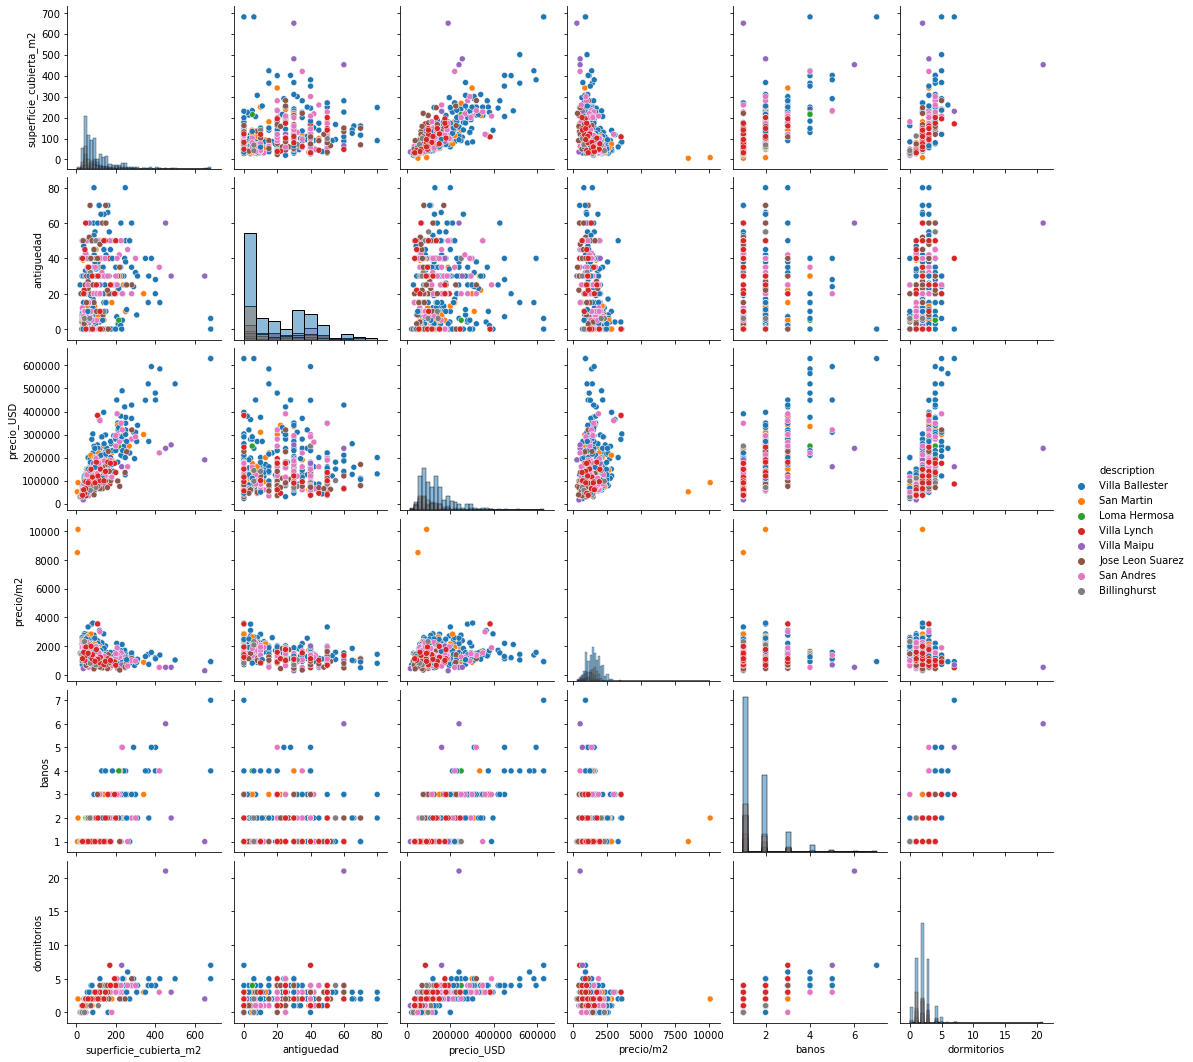

In [88]:
sns.pairplot(features, hue='description',diag_kind="hist")

In [60]:
import seaborn as sns

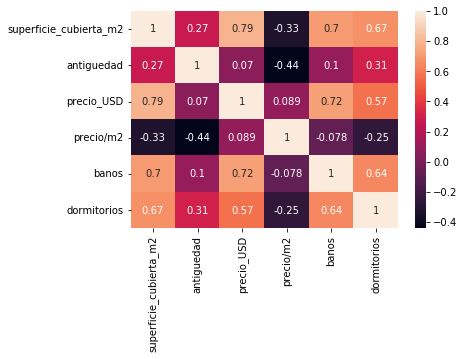

In [90]:
sns.heatmap(features.corr(), annot=True)

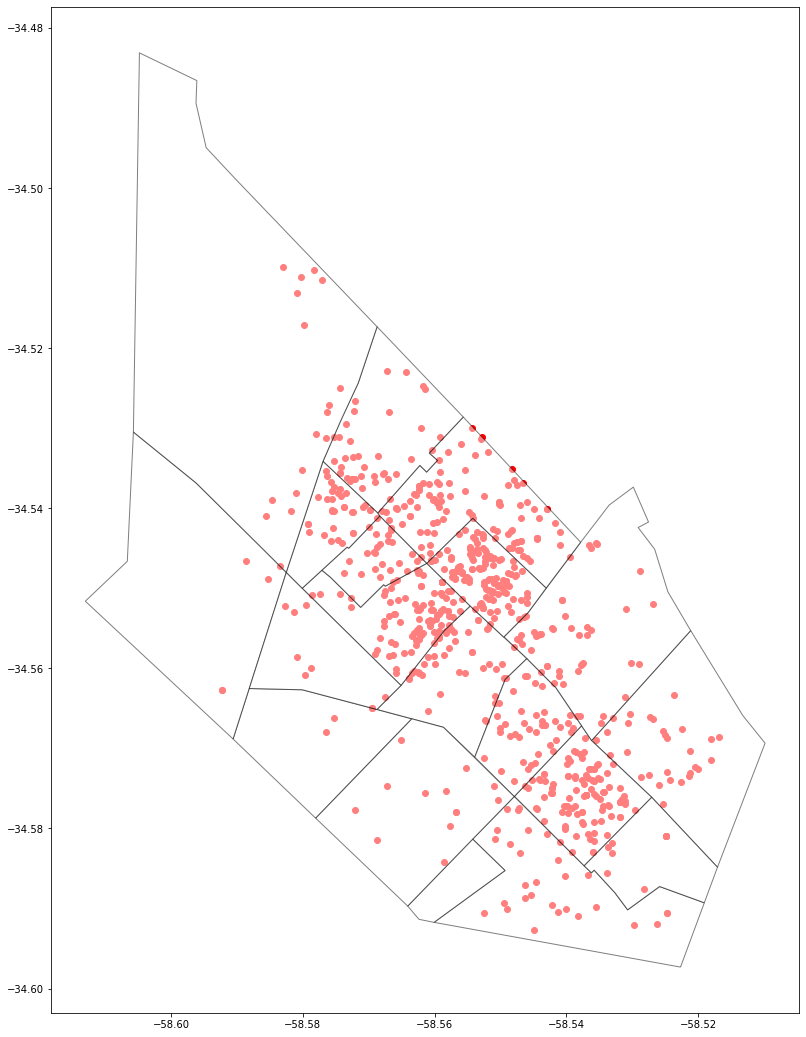

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 18.5)
ax.set_aspect('equal')
join.plot(ax=ax,color='red')
segmentos.plot(ax=ax, color='white', alpha=0.5, edgecolor='black')

plt.show()